# 서울시 유가 정보 분석

In [1]:
import pandas as pd

# file name 합치기 -> file name들을 하나로 묶어줌
from glob import glob

In [2]:
# file name들을 하나로 묶어서 list로 만들어주고 순서는 상관없어 나중에 정렬하면됨
station_file = glob("../Data/Oil/*.xls")
print(station_file)

['../Data/Oil/지역_위치별(주유소) (9).xls', '../Data/Oil/지역_위치별(주유소) (12).xls', '../Data/Oil/지역_위치별(주유소) (5).xls', '../Data/Oil/지역_위치별(주유소) (24).xls', '../Data/Oil/지역_위치별(주유소) (4).xls', '../Data/Oil/지역_위치별(주유소) (13).xls', '../Data/Oil/지역_위치별(주유소) (8).xls', '../Data/Oil/지역_위치별(주유소) (3).xls', '../Data/Oil/지역_위치별(주유소) (18).xls', '../Data/Oil/지역_위치별(주유소) (22).xls', '../Data/Oil/지역_위치별(주유소) (14).xls', '../Data/Oil/지역_위치별(주유소) (15).xls', '../Data/Oil/지역_위치별(주유소) (23).xls', '../Data/Oil/지역_위치별(주유소) (19).xls', '../Data/Oil/지역_위치별(주유소) (2).xls', '../Data/Oil/지역_위치별(주유소) (20).xls', '../Data/Oil/지역_위치별(주유소) (1).xls', '../Data/Oil/지역_위치별(주유소) (16).xls', '../Data/Oil/지역_위치별(주유소) (17).xls', '../Data/Oil/지역_위치별(주유소) (21).xls', '../Data/Oil/지역_위치별(주유소) (10).xls', '../Data/Oil/지역_위치별(주유소).xls', '../Data/Oil/지역_위치별(주유소) (7).xls', '../Data/Oil/지역_위치별(주유소) (6).xls', '../Data/Oil/지역_위치별(주유소) (11).xls']


In [3]:
tmp_raw = []
for file_name in station_file:
    # 데이터를 보니까 3번째 줄부터 쓸만하네
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)
station_raw.head()
    

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,2097,2097,-
1,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,2305,2097,2097,-
2,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,2097,2097,1650
3,서울특별시,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,-,2097,2097,-
4,서울특별시,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),SK에너지,02-902-5544,Y,-,2107,2097,-


In [4]:
len(station_raw)

456

In [5]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


> 6   고급휘발유   456 non-null    object  
> 7   휘발유     456 non-null    object  
> 8   경유      456 non-null    object  
> 9   실내등유    456 non-null    object  
> - 때문에 다 object로 들어옴

In [6]:
# 필요한 항목 발췌
stations = pd.DataFrame({'Oil_store': station_raw['상호'], 
                         '주소' : station_raw['주소'],
                         '가격' : station_raw['휘발유'],
                         '셀프' : station_raw['셀프여부'],
                         '상표' : station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지


In [7]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 8
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  456 non-null    object
 1   주소         456 non-null    object
 2   가격         456 non-null    object
 3   셀프         456 non-null    object
 4   상표         456 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [8]:
# 전체주소가 거의 서울인데 서울특별시가 들어있어서 서울특별시위치만 추출해보기
count = 0
for i in [reg.split()[0] for reg in stations['주소']]:
    if i == '서울특별시':   
        print(count)
    count += 1

49
65
115
189
194
267
277
278
285
309
425


In [9]:
# 주소의 서울특별시를 서울로 변경하기
stations['주소'] = stations['주소'].str.replace('서울특별시','서울')
stations.head()

,Oil_store,주소,가격,셀프,상표
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지


In [10]:
# 주유소별 자치구 항목 추가 (region는 변수이름임)
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL,도봉구
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크,도봉구
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크,도봉구
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL,도봉구
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지,도봉구


In [11]:
# 구 컬럼 확인
# 주소 쓸때 처음부터 스페이스가 들어있으면 구에 서울이 들어옴. 그런거 확인해야함.
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [12]:
# 가격 정보가  '-'인곳 확인
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [13]:
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),2127,Y,S-OIL,도봉구
8,에스오일(주) 염리동주유소,서울 마포구 백범로 126 (염리동),2245,Y,S-OIL,마포구
8,용마주유소,서울 광진구 용마산로 68 (중곡동),2139,N,GS칼텍스,광진구
8,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),2138,Y,SK에너지,중랑구
8,관악시몬주유소,서울 관악구 남부순환로 1753 (봉천동),2188,N,S-OIL,관악구
8,남정주유소,서울 서대문구 모래내로 243 (남가좌동),2158,N,GS칼텍스,서대문구
8,현대오일뱅크㈜직영 하계주유소,서울 노원구 노원로17길 29 (하계동),2155,N,현대오일뱅크,노원구
8,지에스칼텍스㈜ 경인고속주유소,서울 강서구 국회대로 225 (화곡동),2126,Y,GS칼텍스,강서구
8,양천구주유소,서울 양천구 국회대로 275 (목동),2115,Y,알뜰주유소,양천구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구


> 파일을 25개 험쳐서 stations.index가 중복이 많음을 볼수 있다! index 재배열해야함

In [14]:
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),2127,Y,S-OIL,도봉구
8,에스오일(주) 염리동주유소,서울 마포구 백범로 126 (염리동),2245,Y,S-OIL,마포구
8,용마주유소,서울 광진구 용마산로 68 (중곡동),2139,N,GS칼텍스,광진구
8,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),2138,Y,SK에너지,중랑구
8,관악시몬주유소,서울 관악구 남부순환로 1753 (봉천동),2188,N,S-OIL,관악구
8,남정주유소,서울 서대문구 모래내로 243 (남가좌동),2158,N,GS칼텍스,서대문구
8,현대오일뱅크㈜직영 하계주유소,서울 노원구 노원로17길 29 (하계동),2155,N,현대오일뱅크,노원구
8,지에스칼텍스㈜ 경인고속주유소,서울 강서구 국회대로 225 (화곡동),2126,Y,GS칼텍스,강서구
8,양천구주유소,서울 양천구 국회대로 275 (목동),2115,Y,알뜰주유소,양천구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구


In [15]:
# index 재배열
stations.reset_index(drop=True, inplace=True)

In [16]:
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),2127,Y,S-OIL,도봉구


In [17]:
# NaN값 확인하기 => NaN은 없다!
stations[stations['가격'].isnull()]

,Oil_store,주소,가격,셀프,상표,구


In [18]:
## 가격 정보가  '-'인곳 index 가져오기
removeIndex = stations[stations['가격']=='-'].index

In [19]:
stations.drop(removeIndex, axis='index', inplace=True)
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구


In [20]:
# 456 -> 447개로 바뀜.
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [21]:
# 가격 컬럼의 type변환
# dictionary로 바꾸면 하나만 바꿀수 있다.
stations = stations.astype({'가격' : 'int'})
stations.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


In [22]:
import matplotlib.pyplot as plt

# Warning무시
import warnings
warnings.filterwarnings('ignore')

In [23]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [24]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL,도봉구
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크,도봉구
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크,도봉구
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL,도봉구
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지,도봉구


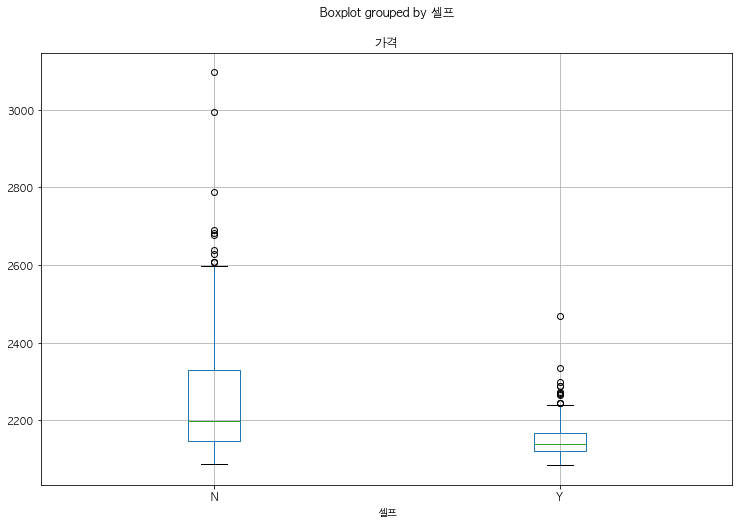

In [25]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))
plt.show()

In [26]:
import seaborn as sns

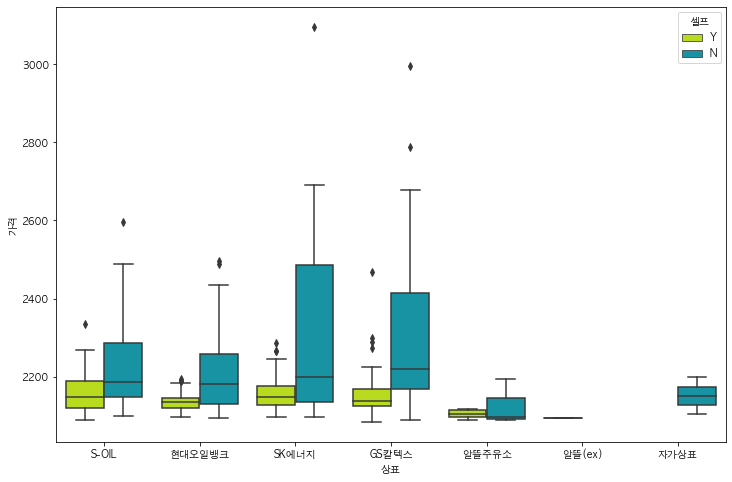

In [27]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize = (12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    hue='셀프',
    data=stations,
    palette='nipy_spectral_r'
)
plt.show()

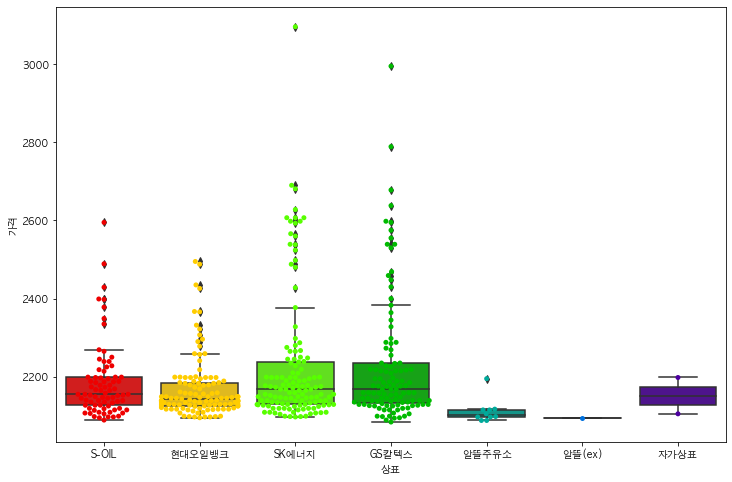

In [28]:
# 상표, 가격, 셀프를 boxplot으로 그리기
# boxplot는 꼭 swarm그래프를 그려주는게 좋다 데이터 퍼짐의 정도를 알수 있어서.
plt.figure(figsize = (12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    data=stations,
    palette='nipy_spectral_r'
)
sns.swarmplot(
    x = '상표',
    y = '가격',
    data=stations,
    palette='nipy_spectral_r'
)
plt.show()

In [29]:
# 가격이 높은순으로 정렬(top10)
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
223,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
277,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
222,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
276,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
275,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
221,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
414,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
274,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
165,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2607,N,SK에너지,종로구
272,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [30]:
# 가격이 높은순으로 정렬(top10)
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
253,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
101,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
102,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
133,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
134,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
254,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
415,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
255,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구
167,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
225,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구


In [31]:
# 가장비싼 가격과 싼 가격 차이
stations['가격'].max() - stations['가격'].min()

1012

In [32]:
import numpy as np

In [33]:
# 구별 가격 평균 높은순 (top10)
gu_data = pd.pivot_table(stations[['가격', '구']],index='구', aggfunc=np.mean)
gu_data.head()
gu_data.sort_values(by='가격', ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


# 지도표시

In [34]:
import json
import folium

In [35]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(
    location= [37.5502, 126.982],
    zoom_start=10.5,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [36]:
# 가격이 제일비싼 top10 구성
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
223,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
277,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
222,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
276,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
275,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
221,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
414,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
274,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
165,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2607,N,SK에너지,종로구
272,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [37]:
# 가격이 제일싼 top10 구성
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
253,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
101,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
102,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
133,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
134,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
254,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
415,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
255,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구
167,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
225,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구


# 위도 경도 NaverApi로 찾아서 만들어보기 (경기,인천)

In [38]:
import urllib.request
import json

client_id = "hgfnj4je2i"
client_secret = "RN6iUXzpU3q0W9y4pSBtekP7Ae5A9CNsEkn0Cz0E"

In [39]:
# Top의 위도 경도 찾기
station_lat = [] # 주소의 위도
station_lng = [] # 주소의 경도

for name in oil_price_top10['주소']:
    print(name)
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data = json.loads(enText)
    #print(data1)
    lng = data['addresses'][0]['x']
    station_lng.append(lng)
    lat = data['addresses'][0]['y']
    station_lat.append(lat)


서울 중구 통일로 30
서울 용산구  청파로 367 (청파동)
서울 중구 퇴계로 196 (필동2가)
서울 용산구 한강대로104길 6 (동자동)
서울 용산구 이촌로 164
서울 중구 다산로 173
서울 강남구 봉은사로 433 (삼성동)
서울 용산구 녹사평대로11길 24
서울 종로구 창경궁로35길 1
서울 용산구 한남대로21길 4 (한남동)


In [40]:
# data

In [41]:
# 위도경도추가
oil_price_top10['lat'] = station_lat
oil_price_top10['lng'] = station_lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
223,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5583881,126.9721764
277,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5523505,126.9689935
222,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5609181,126.9936785
276,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5502224,126.9724921
275,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5215820,126.9653682
221,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5590707,127.0126262
414,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5115603,127.0471387
274,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5222584,126.9931989
165,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2607,N,SK에너지,종로구,37.5860666,127.0010977
272,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5347069,127.0061196


In [42]:
# Top의 위도 경도 찾기
station_blat = [] # 주소의 위도
station_blng = [] # 주소의 경도

for name in oil_price_bottom10['주소']:
    print(name)
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data = json.loads(enText)
    #print(data1)
    lng = data['addresses'][0]['x']
    station_blng.append(lng)
    lat = data['addresses'][0]['y']
    station_blat.append(lat)


서울 강북구 도봉로 122 (미아동)
서울 강서구 곰달래로 207 (화곡동)
서울 강서구 강서로 154 (화곡동)
서울 양천구 신정로 236 (신정동)
서울 양천구 남부순환로 372 (신월동)
서울 강북구 도봉로 395 (수유동)
서울 금천구  시흥대로 81 (시흥동)
서울 강북구 도봉로 200 (미아동)
서울 서초구 양재대로12길 73-71
서울 영등포구 대림로 230


In [43]:
# 위도경도추가
oil_price_bottom10['lat'] = station_blat
oil_price_bottom10['lng'] = station_blng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
253,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구,37.6198926,127.0290662
101,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구,37.5315671,126.8560525
102,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구,37.5407640,126.8414743
133,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구,37.5106122,126.8476904
134,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구,37.5339098,126.8291785
254,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구,37.6422267,127.0295514
415,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구,37.4413366,126.9030994
255,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구,37.6265323,127.0264497
167,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구,37.4602299,127.0419172
225,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구,37.5013196,126.8975277


In [44]:
map = folium.Map(
    location=[37.5520, 126.982],
    zoom_start=11,
)

# 위치 정보를 Marker로 표시
for n in oil_price_top10.index:
    folium.Marker(
        [oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
        popup=oil_price_top10['Oil_store'][n],
        icon=folium.Icon(icon='flag',color='red')
        ).add_to(map)

for n in oil_price_bottom10.index:    
    folium.Marker(
        [oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
        popup=oil_price_bottom10['Oil_store'][n],
        icon=folium.Icon(icon='star',color='green')
        ).add_to(map)
map
